# time Module

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *
#from t_Mod.plots_t import *

ModuleNotFoundError: No module named 'mglearn'

In [2]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR' ]]

display(df.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0.0000,1.0,0.0,0.0000
1,0.9995,0.1798,1.0,0.0,-0.0005
2,0.9985,0.5389,1.0,0.0,-0.0010
3,0.9970,1.0757,1.0,0.0,-0.0015
4,0.9950,1.7884,1.0,0.0,-0.0020


(1.041325, 0.0)

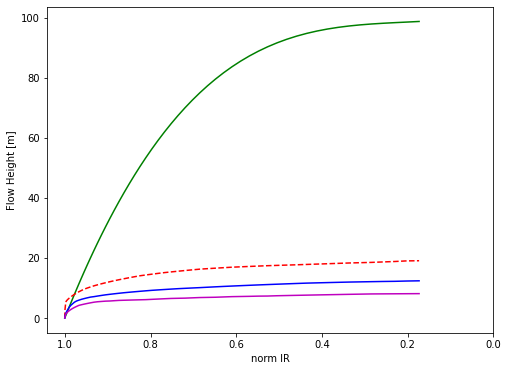

In [3]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [4]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

5

In [5]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


,IR,FlowHt,Sand,Ash,delIR
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,8.958351e-16,5.206563e-16,1.025999e-15,-4.594026e-17,-1.171477e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.176627e+00,-7.652509e-01,-1.580300e+00,-1.494878e+00,-1.700605e+00
25%,-7.680453e-01,-5.173944e-01,-6.833730e-01,-7.687946e-01,-8.652203e-01
50%,2.789270e-01,-3.921051e-01,-4.271081e-02,4.271081e-02,-1.242062e-15
75%,9.075088e-01,-1.197864e-01,7.687946e-01,6.833730e-01,8.652203e-01
max,1.116704e+00,3.380477e+00,1.494878e+00,1.580300e+00,1.700605e+00


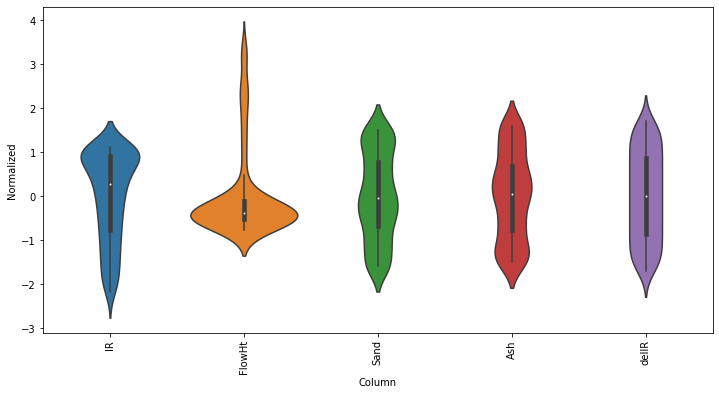

In [6]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()

In [7]:
# data
df_org = df
#df = df_std_s

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [8]:
df.describe()
#print(df[58:116])

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


Text(0, 0.5, 'Flow Height [m]')

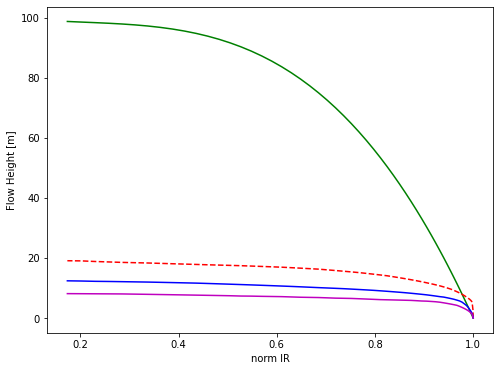

In [9]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([plt.xlim()[1], -2.5])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])



### curve_0

In [10]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)

In [11]:
#m1 = int(n*0.2)
m1 = int(len(curve_0))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_0 = crv_0[0:int(m*0.8)]
    val_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(n*0.25*0.2*i-3):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
#    exec(f'test_df_0{i-1} = test_df_0')


In [12]:
#train_total = {0: train_df_00 , 1: train_df_01, 2: train_df_02, 3: train_df_03}
#val_total = {0: val_df_00 , 1: val_df_01, 2: val_df_02, 3: val_df_03}
#test_total = {0: test_df_00 , 1: test_df_01, 2: test_df_02, 3: test_df_03}

train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
#test_total = [test_df_00, test_df_01, test_df_02]

#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


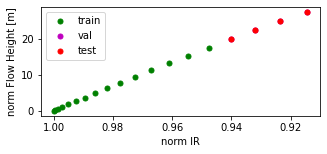

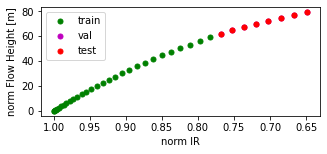

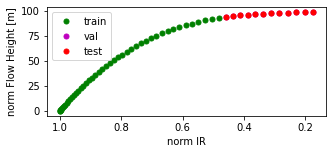

In [13]:
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
#        plot_curve(tr, va, te)
        plots_t.plot_curve(tr, va, te)
#        t_Mod.plots_t.plot_curve(tr, va, te)


### curve_1

In [14]:
crv_1 = curve_1.copy()
#crv_1 = crv_1.reset_index(drop=True)

In [15]:
m1 = int(len(curve_1))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.8)]
    val_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')

In [16]:
train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : val_t_1}
ttt_1 = pd.DataFrame(ttt_1)

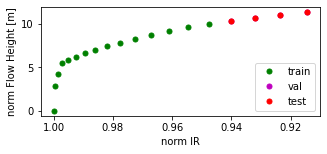

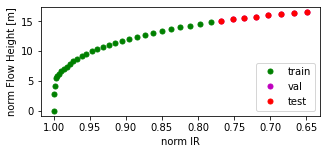

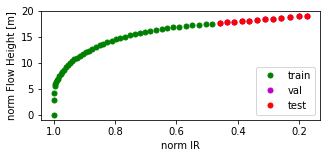

In [17]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_2

In [18]:
crv_2 = curve_2.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [19]:
m1 = int(len(curve_2))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.8)]
    val_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')

In [20]:
train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : val_t_2}
ttt_2 = pd.DataFrame(ttt_2)

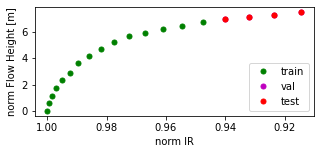

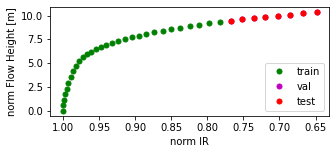

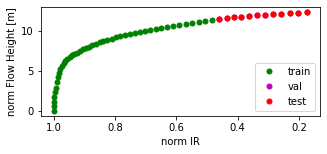

In [21]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_3

In [22]:
crv_3 = curve_3.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [23]:
m1 = int(len(curve_3))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')

In [24]:
train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : val_t_3}
ttt_3 = pd.DataFrame(ttt_3)

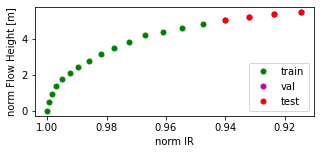

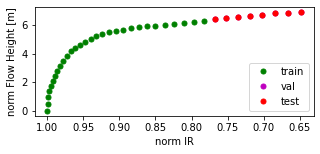

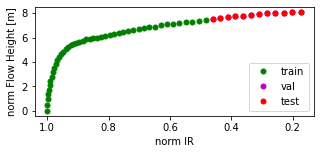

In [25]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)


#### WindowGrerator Class
#### WinGen()

In [26]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [27]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [28]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [29]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [30]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [31]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [32]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

### Convolution Model

In [33]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1),
])




In [34]:
crv_4 = curve_4.copy()
m = len(crv_4)
train_df_41 = crv_4[116:174]  #10% 90%
train_df_42 = crv_4[0:58]  #40% 60%
train_df_43 = crv_4[58:116]  #60% 40%
train_df_4 = crv_4[174:]  #90% 10%
train_df_45 = crv_4[:]  #all


###  Recurrent Neural Network(RNN)

모든 keras RNN 레이어에 대한 중요한 생성자 인수는 `return_sequences` 인수입니다. 이 설정은 다음 두 가지 방법 중 하나로 레이어를 구성할 수 있습니다.

1. 기본값인 `False`인 경우 레이어는 최종 타임스텝의 출력만 반환하여 단일 예측을 수행하기 전에 모델이 내부 상태를 준비할 시간을 줍니다.

![An lstm warming up and making a single prediction](https://www.tensorflow.org/tutorials/structured_data/images/lstm_1_window.png)

1. `True`이면 레이어가 각 입력에 대한 출력을 반환합니다. 다음과 같은 경우에 유용합니다.

- RNN 레이어 쌓기
- 여러 타임스텝에서 동시에 모델 훈련

![An lstm making a prediction after every timestep](https://www.tensorflow.org/tutorials/structured_data/images/lstm_many_window.png)

`return_sequences=True`이면 모델을 한 번에 24시간 분량 데이터에 대해 훈련할 수 있습니다.

Note: This will give a pessimistic view of the model's performance. On the first timestep the model has no access to previous steps, and so can't do any better than the simple linear and dense models shown earlier.



In [35]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [36]:
_ = compile.compile_2(lstm_model)

In [37]:
print('Input shape:', wide_window.example[0].shape)

print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (16, 8, 5)
Output shape: (16, 8, 1)


In [38]:
input_indices = np.arange(wide_window_t.total_window_size )[wide_window_t.input_slice]
label_indices = np.arange(wide_window_t.total_window_size)[wide_window_t.labels_slice]
print(np.arange(wide_window_t.total_window_size ))

print(wide_window_t.input_slice)
print(wide_window_t.labels_slice)


print(np.arange(wide_window_t.total_window_size )[slice(0, 8, None)])

print(np.arange(wide_window_t.total_window_size )[slice(1, None, None)])

[0 1 2 3 4 5 6 7 8]
slice(0, 8, None)
slice(1, None, None)
[0 1 2 3 4 5 6 7]
[1 2 3 4 5 6 7 8]


In [39]:
"""
print(np.arange(wide_window_t.total_window_size *16))
print(np.arange(wide_window_t.total_window_size*16 )[slice(0, wide_window_t.total_window_size*16 -1, None)])
print(np.arange(wide_window_t.total_window_size*16 )[slice(1, None, None)])
"""

'\nprint(np.arange(wide_window_t.total_window_size *16))\nprint(np.arange(wide_window_t.total_window_size*16 )[slice(0, wide_window_t.total_window_size*16 -1, None)])\nprint(np.arange(wide_window_t.total_window_size*16 )[slice(1, None, None)])\n'

In [40]:
"""
def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=1)
                   #   callbacks=[early_stopping])
    return history

n = len(df)*0.5
crv_tr = df[0:int(n*0.75)].copy()
#crv_tr = df[0:int(n*0.25)].copy()
#crv_tr = df[int(n*0.25):int(n*0.50)].copy()
#crv_tr = df[int(n*0.50):int(n*0.75)].copy()
crv_va = df[int(n*0.75):int(n)].copy()

tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []
train_loss = []
val_loss = []
train_mae = []
val_mae = []

window = wide_window
window_t = wide_window_t
model = lstm_model

npat = 50
n_batch = 30

window.train_df = crv_tr
window.val_df = crv_va

hist =  fit_3(model, window, patience= npat, EPOCHS = 300 )

train_loss += hist.history['loss'][-1:]
if 'val_loss' in hist.history:
    print("val_loss not in the list")
    val_loss += hist.history['val_loss'][-1:]

train_mae += hist.history['mean_absolute_error'][-1:]
if 'val_mean_absolute_error' in hist.history:
    print("val_mean_absolute_error not in the list")
    val_mae += hist.history['val_mean_absolute_error'][-1:]

IPython.display.clear_output()

plots_t.eval(hist)

window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))




markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(9,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.scatter(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10, facecolors='none')

            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:,0], label='Predictions',
                          marker='.',  color = colors[j+1], facecolors='none', s=16,zorder=3 )
            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                    #marker=markers[j],  color = colors[j],  facecolors='none' )
                    marker=markers[j ], s=16,  color = colors[j],  facecolors='none' )

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 100], [0, 100], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('train')
plt.gca().set_title(subplot_title)

train_loss = [x/4 for x in train_loss]
val_loss = [x/4 for x in val_loss]
train_mae = [x/4 for x in train_mae]
val_mae = [x/4 for x in val_mae]


"""

'\ndef fit_3(model, window,   patience=2, EPOCHS=None):\n    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=\'val_loss\',\n                                                    patience=patience,\n                                                    mode=\'min\')\n    history = model.fit(window.train, epochs=EPOCHS,\n                      validation_data=window.val, verbose=1)\n                   #   callbacks=[early_stopping])\n    return history\n\nn = len(df)*0.5\ncrv_tr = df[0:int(n*0.75)].copy()\n#crv_tr = df[0:int(n*0.25)].copy()\n#crv_tr = df[int(n*0.25):int(n*0.50)].copy()\n#crv_tr = df[int(n*0.50):int(n*0.75)].copy()\ncrv_va = df[int(n*0.75):int(n)].copy()\n\ntr_loss_con = []\nva_loss_con= []\ntr_mae_con = []\nva_mae_con = []\ntrain_loss = []\nval_loss = []\ntrain_mae = []\nval_mae = []\n\nwindow = wide_window\nwindow_t = wide_window_t\nmodel = lstm_model\n\nnpat = 50\nn_batch = 30\n\nwindow.train_df = crv_tr\nwindow.val_df = crv_va\n\nhist =  fit_3(model, window, pati

In [41]:
"""
wide_window_t.train_df = crv_3
wide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )
plt.gca().set_title('Validataion Curve3')
"""

"\nwide_window_t.train_df = crv_3\nwide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )\nplt.gca().set_title('Validataion Curve3')\n"

In [42]:
"""
wide_window_t.train_df = crv_2
wide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )
plt.gca().set_title('Validataion Curve2')
"""

"\nwide_window_t.train_df = crv_2\nwide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )\nplt.gca().set_title('Validataion Curve2')\n"

In [43]:
"""
wide_window_t.train_df = crv_1
wide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )
plt.gca().set_title('Validataion Curve1')
"""

"\nwide_window_t.train_df = crv_1\nwide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )\nplt.gca().set_title('Validataion Curve1')\n"

In [44]:
"""
wide_window_t.train_df = crv_0
wide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )
plt.gca().set_title('Validataion Curve0')
"""


"\nwide_window_t.train_df = crv_0\nwide_window_t.plot_xy(lstm_model,  n_batch=10, dset_name='train' )\nplt.gca().set_title('Validataion Curve0')\n"

In [45]:
"""
lstm_model2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
"""

'\nlstm_model2 = tf.keras.models.Sequential([\n    # Shape [batch, time, features] => [batch, time, lstm_units]\n    tf.keras.layers.LSTM(16, return_sequences=False),\n    # Shape => [batch, time, features]\n    tf.keras.layers.Dense(units=1)\n])\n'

In [46]:
"""
_ = compile.compile_2(lstm_model2)
"""

'\n_ = compile.compile_2(lstm_model2)\n'

In [47]:
"""
print('Input shape:', wide_window.example[0].shape)

print('Output shape:', lstm_model2(wide_window.example[0]).shape)
"""

"\nprint('Input shape:', wide_window.example[0].shape)\n\nprint('Output shape:', lstm_model2(wide_window.example[0]).shape)\n"

##### 성능

이 데이터세트를 사용하면 일반적으로 각 모델의 성능이 이전 모델보다 약간 더 좋습니다.

In [48]:
"""
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [FlowHt, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()
"""

"\nx = np.arange(len(performance))\nwidth = 0.3\nmetric_name = 'mean_absolute_error'\nmetric_index = lstm_model.metrics_names.index('mean_absolute_error')\nval_mae = [v[metric_index] for v in val_performance.values()]\ntest_mae = [v[metric_index] for v in performance.values()]\n\nplt.ylabel('mean_absolute_error [FlowHt, normalized]')\nplt.bar(x - 0.17, val_mae, width, label='Validation')\nplt.bar(x + 0.17, test_mae, width, label='Test')\nplt.xticks(ticks=x, labels=performance.keys(),\n           rotation=45)\n_ = plt.legend()\n"

In [49]:
"""
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')
"""

"\nfor name, value in performance.items():\n  print(f'{name:12s}: {value[1]:0.4f}')\n"

##### 다중 출력 모델 -skipped


#### Advanced: Residual connections

# Multi-step models
- Baseline
- Single-shot models
- Advanced tutoregressive model
- performance

In [50]:
n = len(df)*0.5
#crv_tr = df[0:int(n*0.75)].copy()
#crv_tr = df[0:int(n*0.25)].copy()
crv_tr = df[int(n*0.25):int(n*0.75)].copy()
#crv_tr = df[int(n*0.50):int(n*0.75)].copy()
crv_va = df[int(n*0.75):int(n*.875)].copy()
crv_te = df[int(n*0.875):int(n)].copy()

train_df=crv_tr
val_df=crv_va
test_df=crv_te


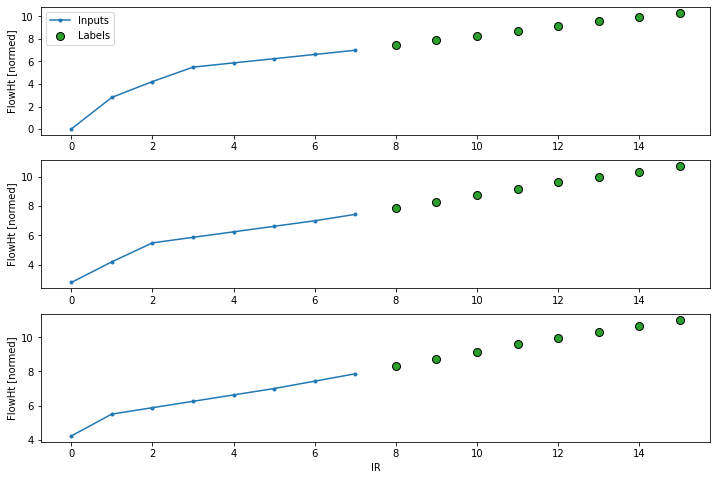

In [51]:
OUT_STEPS = 8
multi_window = Class_t.WindowGenerator(input_width=8, train_df=train_df,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
multi_window.plot()
#multi_window


multi_window.train_df = train_df
multi_window.val_df = val_df
multi_window.test_df = test_df


In [52]:
multi_window_t = Class_t.WinGen(input_width=8, train_df=train_df,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
multi_window_t


multi_window_t.train_df = train_df
multi_window_t.val_df = val_df
multi_window_t.test_df = test_df



### Baselines

A simple baseline for this task is to repeat the last input time step for the required number of output timesteps:

![Repeat the last input, for each output step](https://www.tensorflow.org/tutorials/structured_data/images/multistep_last.png)

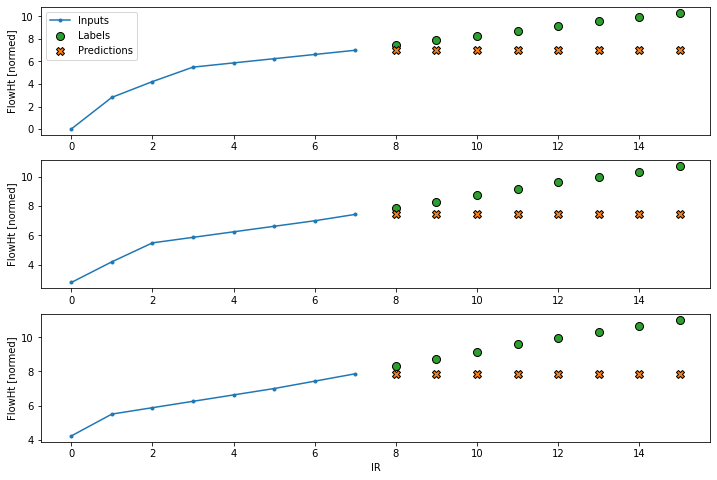

In [53]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])
    # tile the last time step of a batch for the future OUT_STEPS

last_baseline = MultiStepLastBaseline()
#last_baseline.compile(loss=tf.losses.MeanSquaredError(),
#                      metrics=[tf.metrics.MeanAbsoluteError()])

history = compile.compile_and_fit(last_baseline, multi_window)


multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

IPython.display.clear_output()

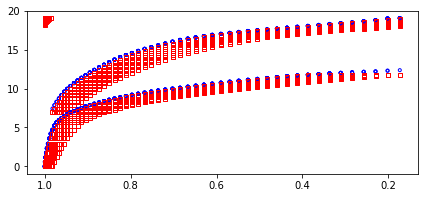

In [54]:
multi_window_t.plot_batch(n_batch=10, model=last_baseline,dset_name='train' )

Since this task is to predict 24h given 24h another simple approach is to repeat the previous day, assuming tomorrow will be similar:
![Repeat the previous day](https://www.tensorflow.org/tutorials/structured_data/images/multistep_repeat.png)

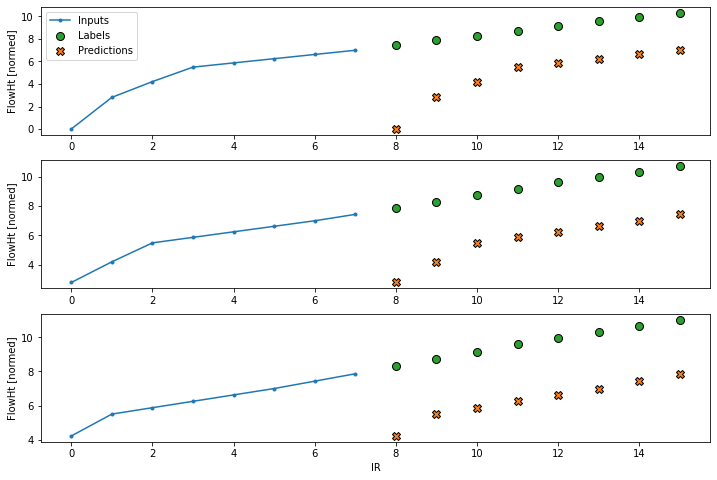

In [55]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
#repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
#                        metrics=[tf.metrics.MeanAbsoluteError()])

history = compile.compile_and_fit(repeat_baseline, multi_window)


multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

IPython.display.clear_output()

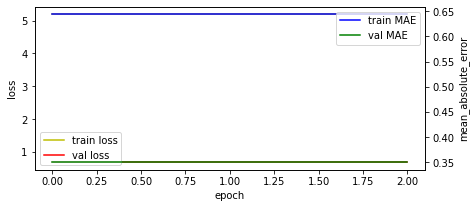

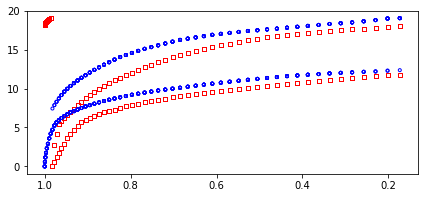

In [56]:
plots_t.eval(history)
multi_window_t.plot_batch(n_batch=10, model=repeat_baseline,dset_name='train' )

### Single-shot models

One high level approach to this problem is use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a `layers.Dense` with `OUT_STEPS*features` output units.
The model just needs to reshape that output to the required `(OUTPUT_STEPS, features)`.

#### Linear

A simple linear model based on the last input time step does better than either baseline,
but is underpowered. The model needs to predict `OUTPUT_STEPS` time steps, from a single
input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

![Predct all timesteps from the last time-step](https://www.tensorflow.org/tutorials/structured_data/images/multistep_dense.png)

1/1 [==============================] - 0s 0s/step - loss: 0.0422 - mean_absolute_error: 0.1578


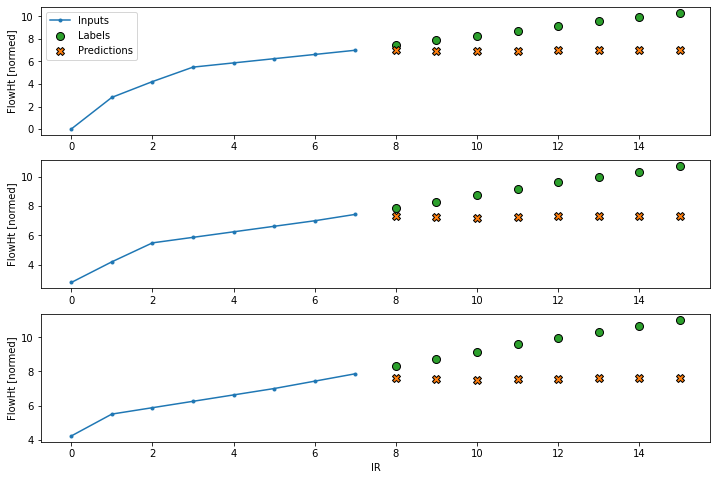

In [57]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile.compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)



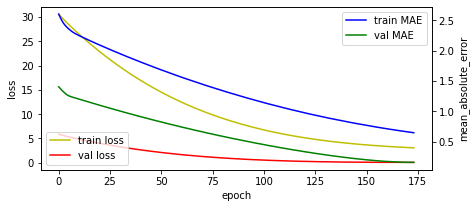

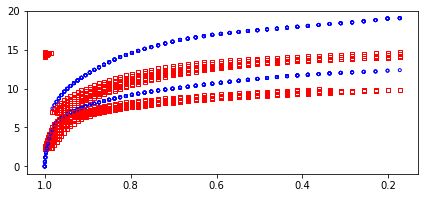

In [58]:
plots_t.eval(history)

multi_window_t.plot_batch(n_batch=10, model=multi_linear_model,dset_name='train' )

#### Dense

Adding a `layers.Dense` between the input and output gives the linear model more power,
but is still only based on a single input timestep.


In [59]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

1/1 [==============================] - 0s 0s/step - loss: 0.2213 - mean_absolute_error: 0.3592


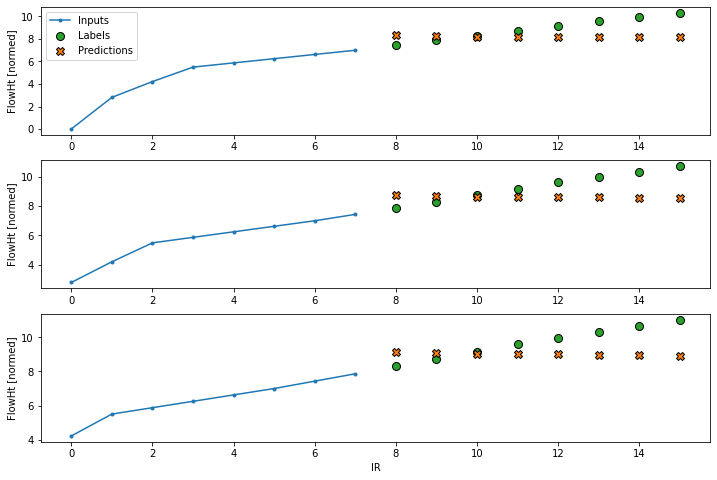

In [60]:

history = compile.compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)

multi_window.plot(multi_dense_model)


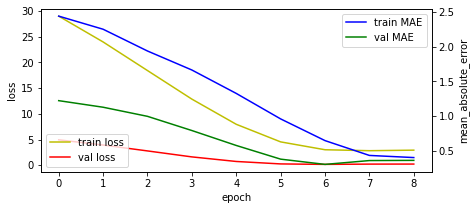

In [61]:
plots_t.eval(history)

In [62]:
print('Input shape:', multi_window.example[0].shape)

print('Output shape:', multi_dense_model(multi_window.example[0]).shape)

Input shape: (16, 8, 5)
Output shape: (16, 8, 5)


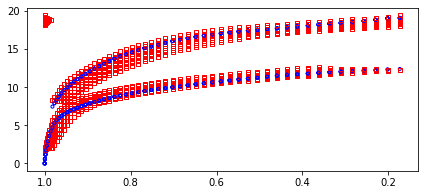

In [63]:

multi_window_t.plot_batch(n_batch=10, model=multi_dense_model,dset_name='train' )

Text(0.5, 1.0, 'Validataion Curve3')

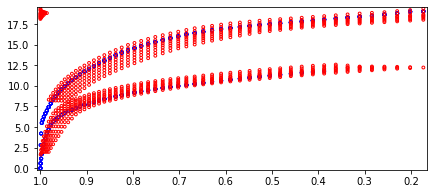

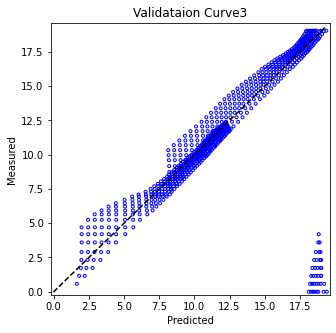

In [64]:
multi_window_t.plot_xy(multi_dense_model,  n_batch=20, dset_name='train' )
plt.gca().set_title('Validataion Curve3')

In [65]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])


In [66]:
_ = compile.compile_2(multi_dense_model)

In [67]:
# window data setup for fitting
n = len(df)*0.5
#crv_tr = df[0:int(n*0.75)].copy()
#crv_tr = df[0:int(n*0.25)].copy()
crv_tr = df[int(n*0.50):int(n*0.75)].copy()
#crv_tr = df[int(n*0.50):int(n*0.75)].copy()
crv_va = df[int(n*0.75):int(n*.875)].copy()
crv_te = df[int(n*0.875):int(n)].copy()

train_df=crv_tr
val_df=crv_va
test_df=crv_te

multi_window.train_df = train_df
multi_window.val_df = val_df
multi_window.test_df = test_df

multi_window_t.train_df = train_df
multi_window_t.val_df = val_df
multi_window_t.test_df = test_df



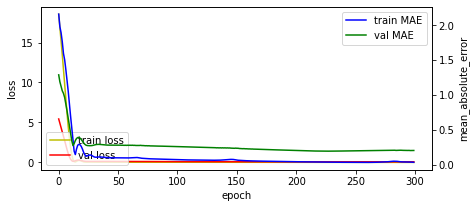

In [68]:
def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=2)
#                      callbacks=[early_stopping])
    return history
"""
n = len(df)*0.5
crv_tr = df[0:int(n*0.75)].copy()
#crv_tr = df[0:int(n*0.25)].copy()
#crv_tr = df[int(n*0.25):int(n*0.50)].copy()
#crv_tr = df[int(n*0.50):int(n*0.75)].copy()
crv_va = df[int(n*0.75):int(n*0.875)].copy()
crv_te = df[int(n*0.875):int(n)].copy()
"""
window = multi_window
window_t = multi_window_t
model = multi_dense_model

npat = 20
n_batch = 30

hist =  fit_3(model, window, patience= npat, EPOCHS = 300 )

IPython.display.clear_output()

plots_t.eval(hist)

Text(0.5, 1.0, 'train')

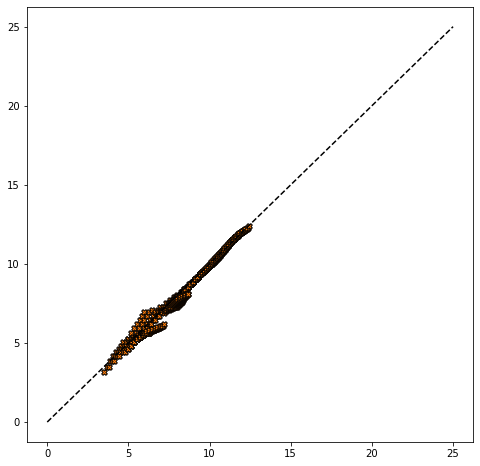

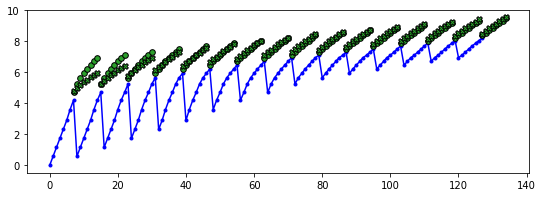

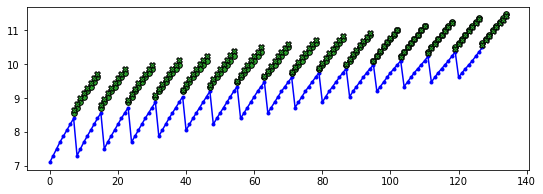

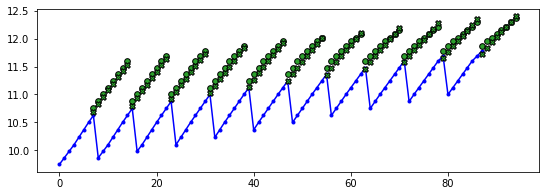

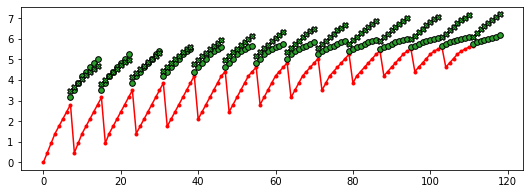

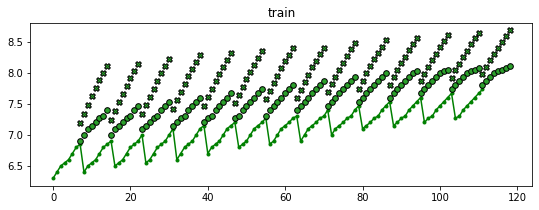

In [71]:
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16 )[slice(7, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(8,8))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val, window_t.test]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(9,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),5)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),5)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:,1],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:,1], label='Predictions',
                          marker='X',  edgecolors='k', c='#2ca02c', s=32)
            ax3.scatter(predictions[:, :, 1], labels[:, :, 1],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=32)
            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue
            if i == 0:
                ax5.legend()
ax3.plot([0, 25], [0, 25], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('train')
plt.gca().set_title(subplot_title)



#### CNN

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than
the dense model since it can see how things are changing over time:

![A convolutional model sees how things change over time](https://www.tensorflow.org/tutorials/structured_data/images/multistep_conv.png)

In [66]:
n = len(df)*0.5
crv_tr = df[0:int(n*0.75)].copy()
#crv_tr = df[0:int(n*0.25)].copy()
#crv_tr = df[int(n*0.25):int(n*0.50)].copy()
#crv_tr = df[int(n*0.50):int(n*0.75)].copy()
#crv_va = df[int(n*0.75):int(n)].copy()
crv_va = df[int(n*0.75):int(n*.875)].copy()
crv_te = df[int(n*0.875):int(n)].copy()
train_df=crv_tr
val_df=crv_va


multi_window.train_df = train_df
multi_window.val_df = val_df
multi_window.test_df = test_df

multi_window_t.train_df = train_df
multi_window_t.val_df = val_df
multi_window_t.test_df = test_df

1/1 [==============================] - 0s 0s/step - loss: 0.4613 - mean_absolute_error: 0.5178


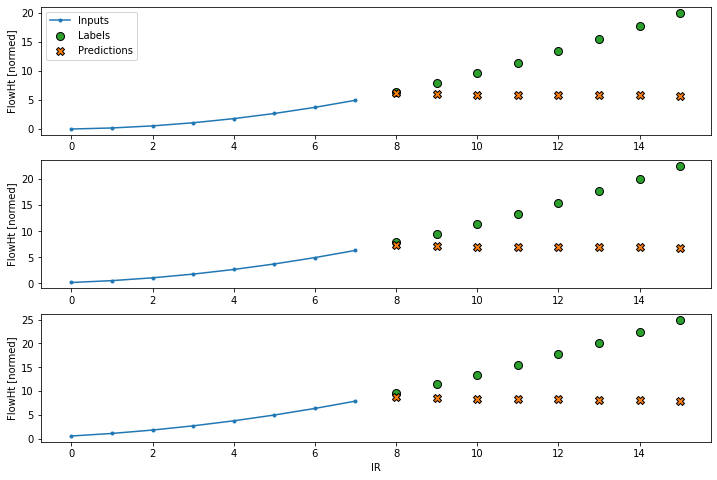

In [67]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile.compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

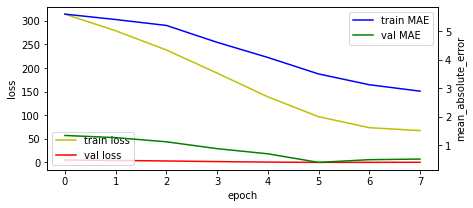

In [68]:
plots_t.eval(history)

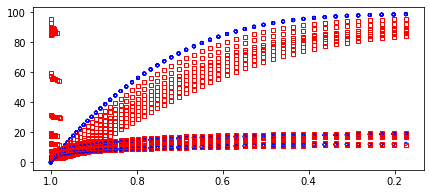

In [69]:
multi_window_t.plot_batch(model=multi_conv_model, dset_name='train', n_batch=10, )


#### RNN

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 24h, before making a single prediction for the next 24h.

In this single-shot format, the LSTM only needs to produce an output at the last time step,
so set `return_sequences=False`.

![The lstm accumulates state over the input window, and makes a single prediction for the next 24h](https://www.tensorflow.org/tutorials/structured_data/images/multistep_lstm.png)


1/1 [==============================] - 0s 0s/step - loss: 0.2305 - mean_absolute_error: 0.3451


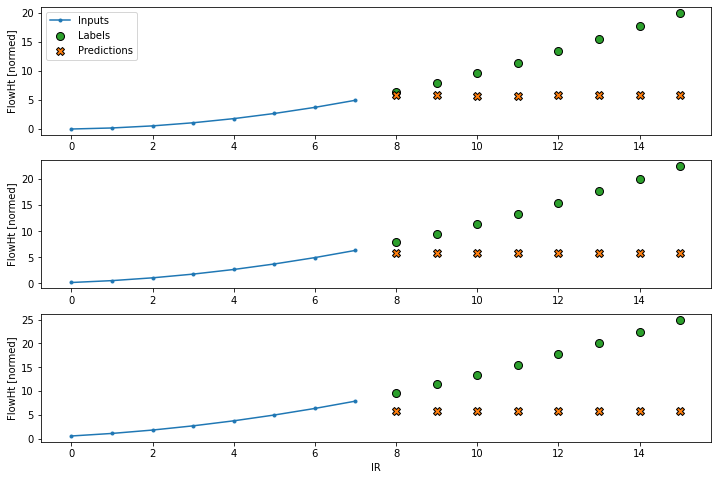

In [71]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile.compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

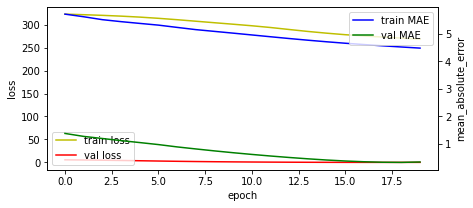

In [72]:
plots_t.eval(history)

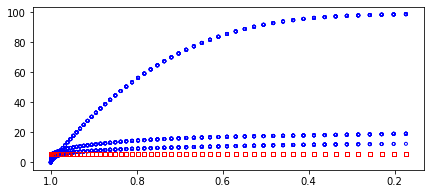

In [74]:
multi_window_t.plot_batch(model=multi_lstm_model, dset_name='train',n_batch=10, )

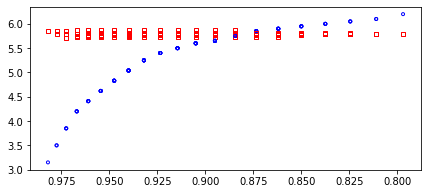

In [75]:
multi_window_t.plot_batch(model=multi_lstm_model,dset_name='val', n_batch=10, )

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic Generating Sequences With Recurrent Neural Networks.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

![Feedback a model's output to its input](https://www.tensorflow.org/tutorials/structured_data/images/multistep_autoregressive.png)


#### RNN
This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single timestep.

The model will have the same basic form as the single-step LSTM models: An LSTM followed by a layers.Dense that converts the LSTM outputs to model predictions.

A layers.LSTM is a layers.LSTMCell wrapped in the higher level layers.RNN that manages the state and sequence results for you (See Keras RNNs for details).

In this case the model has to manually manage the inputs for each step so it uses layers.LSTMCell directly for the lower level, single time step interface.


이 튜토리얼에서는 자기 회귀 RNN 모델만 빌드하지만 이 패턴은 단일 타임스텝을 출력하도록 설계된 모든 모델에 적용할 수 있습니다.

이 모델은 단일 스텝 `LSTM` 모델과 기본 형태가 동일하여 `LSTM` 다음에 `LSTM` 출력을 모델 예측으로 변환하는 `layers.Dense`가 이어집니다.

`layers.LSTM`은 상태와 시퀀스 결과를 자동으로 관리하는 더 높은 수준의 `layers.RNN`에서 래핑된 `layers.LSTMCell`입니다(자세한 내용은 [Keras RNN](https://www.tensorflow.org/guide/keras/rnn) 참조).

이 경우 모델은 각 스텝에 대한 입력을 수동으로 관리해야 하므로 더 낮은 수준의 단일 타임스텝 인터페이스에 대해 `layers.LSTMCell`를 직접 사용합니다.

In [76]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [77]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

이 모델에 필요한 첫 번째 메서드는 입력을 기반으로 내부 상태를 초기화하는 `warmup` 메서드입니다. 일단 훈련되면 이 상태는 입력 기록의 관련 부분을 캡처합니다. 이는 앞서 알아본 단일 스텝 `LSTM` 모델과 동일합니다.

In [78]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

이 메서드는 단일 타임스텝 예측과 LSTM의 내부 상태를 반환합니다.

In [79]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([16, 5])

`RNN`의 상태 및 초기 예측을 사용하여 이제 이전의 각 스텝에서 수행한 예측을 입력으로 제공하여 모델을 계속 반복할 수 있습니다.

출력 예측을 수집하는 가장 간단한 방법은 Python 목록을 사용하고 루프 후에 `tf.stack`을 사용하는 것입니다.

참고: 이와 같이 Python 목록을 쌓는 것은 훈련을 위해 `Model.compile(..., run_eagerly=True)`를 사용하거나 고정 길이의 출력을 통해 즉시 실행하는 경우에만 효과가 있습니다. 동적 출력 길이의 경우 Python 목록 대신 `tf.TensorArray`를 사용하고 Python `range` 대신 `tf.range`를 사용해야 합니다.

In [80]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

예제 입력에서 이 모델을 테스트 실행합니다.

In [81]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (16, 8, 5)


이제 모델을 훈련합니다.

1/1 [==============================] - 0s 0s/step - loss: 1.1768 - mean_absolute_error: 0.8721


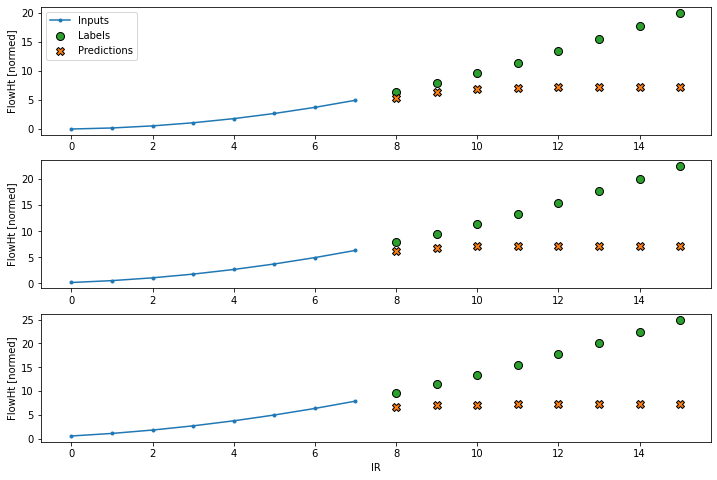

In [82]:
history = compile.compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [88]:
feedback_model.evaluate(multi_window.val)

1/1 [==============================] - 0s 1ms/step - loss: 1.1768 - mean_absolute_error: 0.8721


[1.1767548322677612, 0.872118353843689]

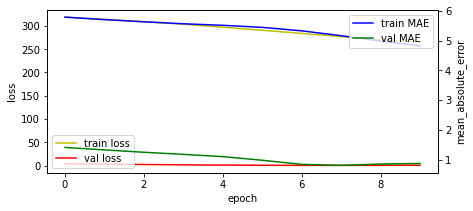

In [89]:
plots_t.eval(history)

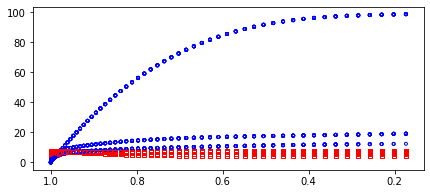

In [83]:
multi_window_t.plot_batch(model=feedback_model, dset_name='train',n_batch=10, )

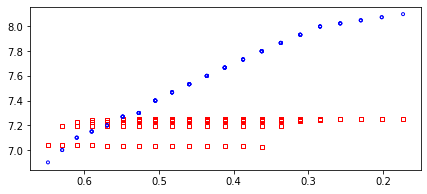

In [85]:
multi_window_t.plot_batch(model=feedback_model,dset_name='test', n_batch=10, )


### 성능

There are clearly diminishing returns as a function of model complexity on this problem.

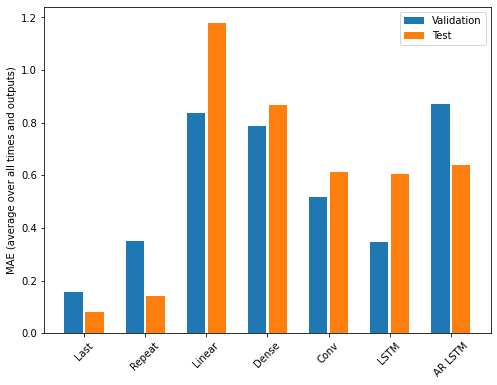

In [90]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = feedback_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

이 튜토리얼의 전반부에서 소개한 다중 출력 모델에 대한 메트릭은 모든 출력 특성에 평균화된 성능을 보여줍니다. 이러한 성능은 유사하지만 출력 타임스텝에서도 평균화됩니다. 

In [91]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.0799
Repeat  : 0.1429
Linear  : 1.1804
Dense   : 0.8667
Conv    : 0.6112
LSTM    : 0.6064
AR LSTM : 0.6394


밀집 모델에서 컨볼루션 및 반복 모델로 이동하여 얻은 이득은 몇 퍼센트(있다고 하더라도)에 불과하며 자기 회귀 모델의 성능은 분명히 더 나빴습니다. 따라서 이러한 더 복잡한 접근 방법은 **이** 문제에서는 가치가 없을 수도 있지만 시도해 보기 전에는 알 수 있는 방법이 없었으며 이러한 모델은 **다른 특정** 문제에 도움이 될 수 있습니다.

## 다음 단계

이 튜토리얼에서는 TensorFlow를 사용한 시계열 예측에 대해 간단히 소개했습니다.

- 자세한 내용은 다음을 참조하세요.
    - [Scikit-Learn, Keras 및 TensorFlow를 이용한 머시러닝 실무](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)(2차 개정 버전), 챕터 15
    - [Python을 이용한 딥러닝](https://www.manning.com/books/deep-learning-with-python) 챕터 6
    - [Udacity의 딥러닝 TensorFlow 개론](https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187) 레슨 8 및 [연습 노트북](https://github.com/tensorflow/examples/tree/master/courses/udacity_intro_to_tensorflow_for_deep_learning)
- 또한 TensorFlow에서 [기존의 시계열 모델](https://otexts.com/fpp2/index.html)은 모두 구현할 수 있다는 점을 기억하세요. 이 튜토리얼에서는 TensdorFlow의 내장 기능에 초점을 맞추었습니다.